# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


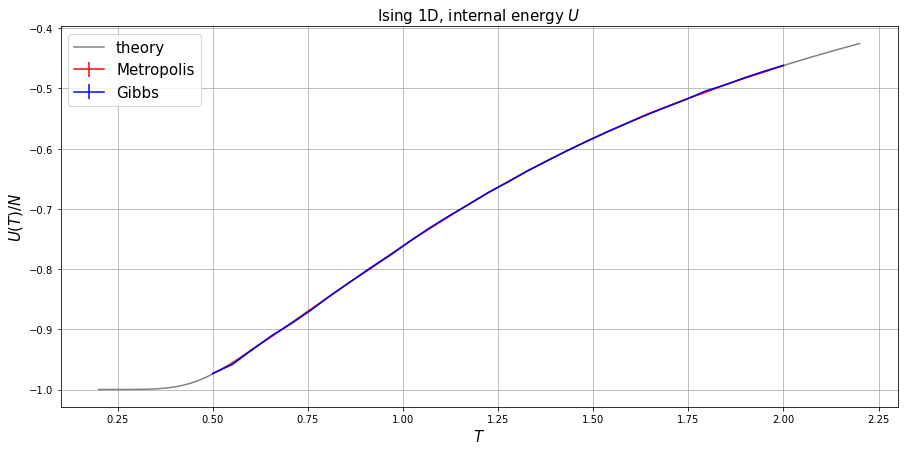

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

def compare_plot(title, x_label, y_label, T_sim, y_metro, err_metro, y_gibbs, err_gibbs, T_theo, y_theo):
    '''
    Plot comparison between theoretical results, Metropolis simulation and Gibbs simulation.
    '''
    plt.figure(figsize=(15, 7))
    
    plt.errorbar(T_sim, y_metro, err_metro, color='r', label='Metropolis')
    plt.errorbar(T_sim, y_gibbs, err_gibbs, color='b', label='Gibbs')
    plt.plot(T_theo, y_theo, color='gray', label='theory')
    
    plt.title(title, size=15)
    plt.xlabel(x_label, size=15)
    plt.ylabel(y_label, size=15)
    
    plt.grid()
    plt.legend(fontsize=15)
    plt.show()

# define some variables for theoretical calculations
points = 100
T = np.linspace(0.2, 2.2, num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN = th**Ns
ch = 1/th

# calculation of theoretical results
e = -J*( th + ch*thN )/( 1 + thN )
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
h=0.02 #external field
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

# load results from simulation
T_sim, u_metro, u_err_metro, c_metro, c_err_metro, chi_metro, chi_err_metro = np.loadtxt("data/metro_h=0.txt", delimiter=',', skiprows=1, unpack=True, usecols=(0,1,2,3,4,5,6))
m_metro, m_err_metro = np.loadtxt("data/metro_h=0.02.txt", delimiter=',', skiprows=1, unpack=True, usecols=(7,8))
T_sim, u_gibbs, u_err_gibbs, c_gibbs, c_err_gibbs, chi_gibbs, chi_err_gibbs = np.loadtxt("data/gibbs_h=0.txt", delimiter=',', skiprows=1, unpack=True, usecols=(0,1,2,3,4,5,6))
m_gibbs, m_err_gibbs = np.loadtxt("data/gibbs_h=0.02.txt", delimiter=',', skiprows=1, unpack=True, usecols=(7,8))

compare_plot('Ising 1D, internal energy $U$', r'$T$', r'$U(T)/N$', T_sim, u_metro, u_err_metro, u_gibbs, u_err_gibbs, T, e)

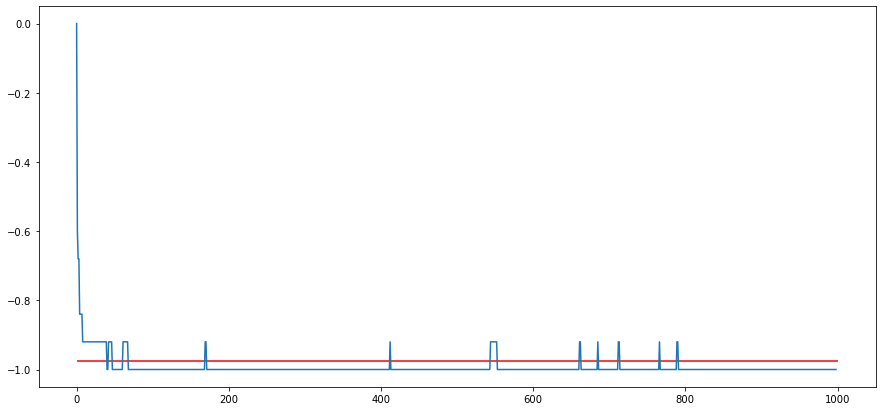

In [27]:
u = np.loadtxt("data/metro_equi")
plt.figure(figsize=(15,7))
plt.plot(u / 50)
th = np.tanh(J/0.5)
thN = th**Ns
ch = 1/th
plt.hlines( -J*( th + ch*thN )/( 1 + thN ), 0, 1000, color='r')
plt.show()

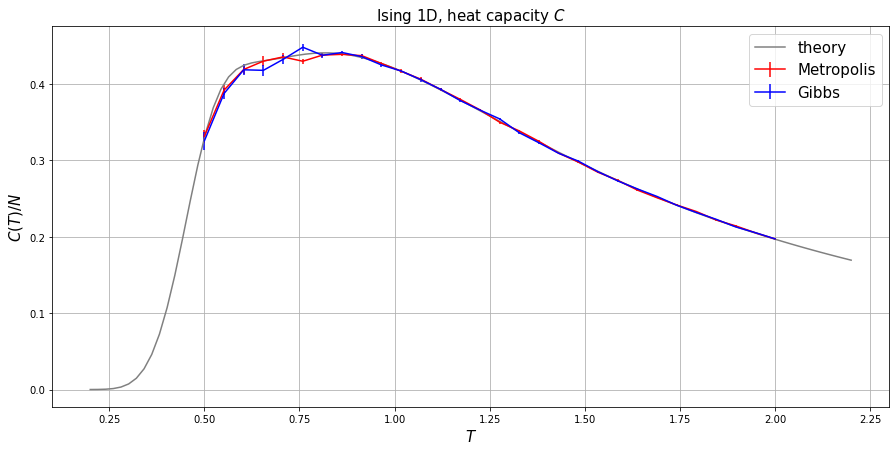

In [8]:
compare_plot('Ising 1D, heat capacity $C$', r'$T$', r'$C(T)/N$', T_sim, c_metro, c_err_metro, c_gibbs, c_err_gibbs, T, heat)

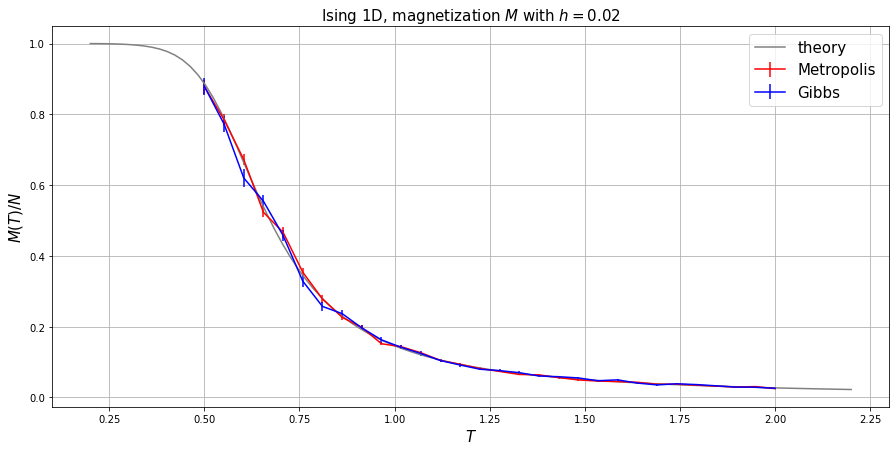

In [9]:
compare_plot('Ising 1D, magnetization $M$ with $h = 0.02$', r'$T$', r'$M(T)/N$', T_sim, m_metro, m_err_metro, m_gibbs, m_err_gibbs, T, M)

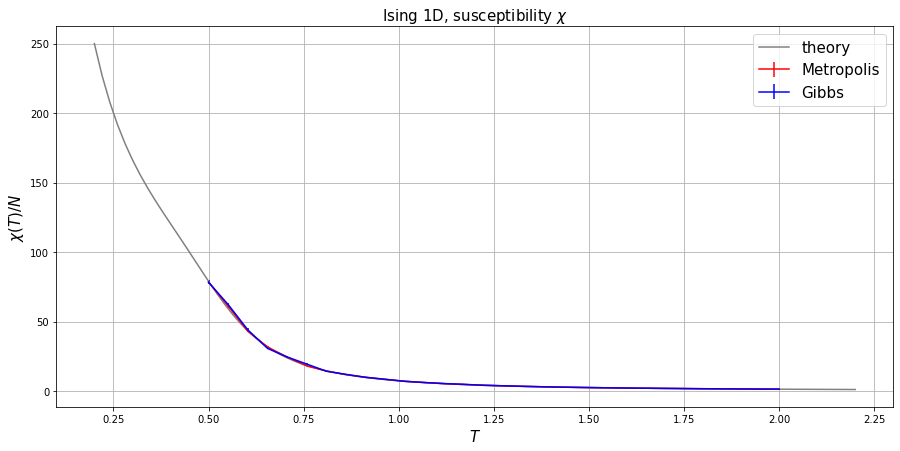

In [10]:
compare_plot('Ising 1D, susceptibility $\chi$', r'$T$', r'$\chi(T)/N$', T_sim, chi_metro, chi_err_metro, chi_gibbs, chi_err_gibbs, T, X)